In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import re
import string
%matplotlib inline

In [2]:
df = pd.read_csv('Moore.csv', engine='python',error_bad_lines=False, header=None, sep='\t')


In [3]:
columns = ['Chip Name', 'Number', 'Year', 'Company', 'size per chip', 'total size']
df.columns = columns
df

,Chip Name,Number,Year,Company,size per chip,total size
0,Intel 4004,"2,300",1971,Intel,"10,000 nm",12 mm²
1,Intel 8008,"3,500",1972,Intel,"10,000 nm",14 mm²
2,Intel 8080,"4,500",1974,Intel,"6,000 nm",20 mm²
3,Motorola 6800,"4,100",1974,Motorola,"6,000 nm",16 mm²
4,RCA 1802,"5,000",1974,RCA,"5,000 nm",27 mm²
...,...,...,...,...,...,...
97,IBM z13,"3,990,000,000",2015,IBM,22 nm,678 mm²
98,IBM z13 Storage Controller,"7,100,000,000",2015,IBM,22 nm,678 mm²
99,Quad-core + GPU GT2 Core i7 Skylake K,"cca 1,750,000,000",2015,Intel,14 nm,122 mm²
100,SPARC M7,"10,000,000,000[37]",2015,Oracle,20 nm,NaN


In [4]:
pattern = '\[[0-9]*[a-z]*[A-Z]*\]'


In [5]:
# pattern = '\[\d\]'
# def clearning_username(text):
#     text = text.lower()
#     text = re.sub(pattern,'', str(text))
#     print(text)
#     return text.lower()
# print(clearning_username('Bibek[5]prs'))

In [6]:
def clean(x):
    text= re.sub(pattern,'', str(x))
    text = re.sub('[%s]' % string.punctuation, '', text)
    text = re.sub('[a-z]*[A-Z]*', '', text)
    return text.lower()


round1 = lambda x: clean(x)

In [7]:
ok = 'Bibek[4] I , ? am b[dfd]'
print(clean(ok))

In [8]:
df.Year = pd.DataFrame(df['Year'].apply(round1))
df.Number = pd.DataFrame(df['Number'].apply(round1))
df

,Chip Name,Number,Year,Company,size per chip,total size
0,Intel 4004,2300,1971,Intel,"10,000 nm",12 mm²
1,Intel 8008,3500,1972,Intel,"10,000 nm",14 mm²
2,Intel 8080,4500,1974,Intel,"6,000 nm",20 mm²
3,Motorola 6800,4100,1974,Motorola,"6,000 nm",16 mm²
4,RCA 1802,5000,1974,RCA,"5,000 nm",27 mm²
...,...,...,...,...,...,...
97,IBM z13,3990000000,2015,IBM,22 nm,678 mm²
98,IBM z13 Storage Controller,7100000000,2015,IBM,22 nm,678 mm²
99,Quad-core + GPU GT2 Core i7 Skylake K,1750000000,2015,Intel,14 nm,122 mm²
100,SPARC M7,10000000000,2015,Oracle,20 nm,NaN


In [9]:
xs = np.array(df.Year, dtype=np.float64)
ys = np.array(df.Number, dtype=np.float64)

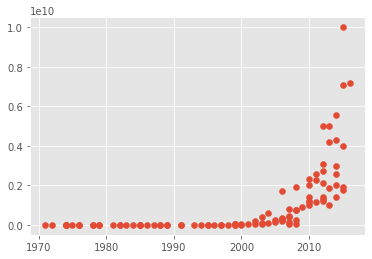

In [10]:
plt.scatter(xs, ys)


In [11]:
import math
from statistics import mean
def best_fit_slope_and_m(xs,ys):
    m = (mean(xs) * mean(ys) - mean(xs * ys)) / (mean(xs)*mean(xs) - mean(xs*xs)) 
    b = mean(ys) - m*mean(xs)
    return (m, b)

m, b = best_fit_slope_and_m(xs, ys)
print(m, b)

78368485.07007712 -155669591648.83676


In [12]:
regression_line = [(m*x)+b for x in xs]
regression_line

[-1205307575.7147522,
 -1126939090.6446838,
 -970202120.5045166,
 -970202120.5045166,
 -970202120.5045166,
 -970202120.5045166,
 -891833635.4344482,
 -813465150.3643799,
 -813465150.3643799,
 -656728180.2242126,
 -656728180.2242126,
 -578359695.1541443,
 -578359695.1541443,
 -421622725.01397705,
 -343254239.9439087,
 -343254239.9439087,
 -264885754.87384033,
 -186517269.80374146,
 -108148784.7336731,
 -108148784.7336731,
 -108148784.7336731,
 -29780299.663604736,
 48588185.40646362,
 126956670.4765625,
 126956670.4765625,
 205325155.54663086,
 205325155.54663086,
 362062125.6867981,
 362062125.6867981,
 518799095.8269348,
 597167580.8970032,
 675536065.967102,
 675536065.967102,
 753904551.0371704,
 832273036.1072388,
 832273036.1072388,
 910641521.1773376,
 989010006.247406,
 989010006.247406,
 989010006.247406,
 989010006.247406,
 989010006.247406,
 1067378491.3174744,
 1067378491.3174744,
 1145746976.3875732,
 1224115461.4576416,
 1224115461.4576416,
 1302483946.52771,
 1302483946.5

In [13]:
style.use('fivethirtyeight')

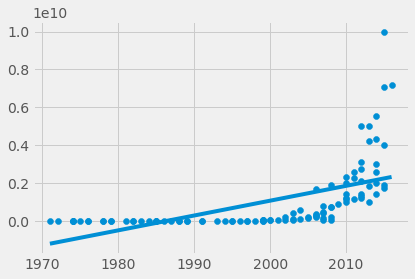

In [14]:
plt.scatter(xs, ys)
plt.plot(xs, regression_line)
plt.show()

In [15]:
def squared_error(ys_orig, ys_line):
    return (ys_line - ys_orig)**2

def coeff_of_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_reg = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys, y_mean_line)

    return (1 - squared_error_reg / squared_error_y_mean)

In [16]:
r_squ = coeff_of_determination(ys, regression_line)

In [17]:
r_squ

array([-3.39937667e-01, -1.71363675e-01,  1.31804623e-01,  1.31806006e-01,
        1.31802895e-01,  1.31792523e-01,  2.66400057e-01,  3.89654827e-01,
        3.89649481e-01,  6.02150242e-01,  6.02189756e-01,  6.91433318e-01,
        6.91368585e-01,  8.36029186e-01,  8.91281835e-01,  8.91215287e-01,
        9.35271887e-01,  9.67836285e-01,  9.89206802e-01,  9.89151647e-01,
        9.89208784e-01,  9.99180323e-01,  9.97869578e-01,  9.85170924e-01,
        9.85185303e-01,  9.61207315e-01,  9.61474571e-01,  8.79108249e-01,
        8.79681171e-01,  7.53243964e-01,  6.71361639e-01,  5.81513235e-01,
        5.80192816e-01,  4.77430505e-01,  3.63855254e-01,  3.63449146e-01,
        2.36734180e-01,  9.98230746e-02,  9.98898274e-02,  9.78438241e-02,
        1.00407792e-01,  9.87110816e-02, -5.29679932e-02, -5.18639717e-02,
       -2.20768730e-01, -4.94894536e-01, -4.05192387e-01, -6.36563210e-01,
       -5.99417703e-01, -9.98896243e-01, -2.08321931e+00, -8.64454545e-01,
       -1.18796596e+00, -

# using sklearn linear regression

In [18]:
x = np.array(df.Year, dtype=np.float64)
y = np.array(df.Number, dtype=np.float64)

In [19]:
# x= x.reshape(1, -1)
# y= y.reshape(1, -1)
print(len(x))

102


In [30]:
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [31]:
x = preprocessing.scale(x)


In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2)

In [35]:
clf = SVR(kernel='poly')
clf.fit(X_train.reshape(-1, 1), Y_train.reshape(-1,1))
Accuracy = clf.score(X_test.reshape(-1, 1), Y_test.reshape(-1, 1))
Accuracy

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


-0.1790008301230861

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=38a5f705-02d4-481a-a9f2-a7b671e2e93f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>